# Importamos las librerias necesarias

In [5]:
#!/usr/bin/env python3
# coding: utf-8

# # Importar librerías
from pylab import rand, plot, show, norm

# Definimos la clase Perceptron

In [6]:
# # Clase Perceptron
class Perceptron:
    """
    Perceptron Simple

    Parametros:
        w_: array-1d
            Pesos actualizados después del ajuste.
            
        tasaApren_: float
            Tasa de aprendizaje.
    """
    def __init__(self, w_= rand(2)*2-1, tasaApren_ = 0.1):
        """ 
        Metodo constructor del preceptron, 
        inicialza los valores por defecto.
        """
        self.w = w_                     # Vector w, representa los pesos.
        self.tasaApren = tasaApren_     # Tasa de aprendizaje.

    def respuesta(self, x):
        """ 
        Salida del perceptron, aplica el producto 
        punto entre w (pesos) y x (data).
        
        Parametros:
            x: list, forma [coordenada x, coordenada y]
                Data que se esta analizando.

        Retorna:
            int: Si el producto punto es mayor o igual 
            a cero devuelve '1' de lo contrario '-1'
        """
        
        # Producto punto entre w y x.
        y = (x[0] * self.w[0]) + (x[1] * self.w[1])     

        if y >= 0:
            return 1
        else:
            return -1

    def actualizarPesos(self, x, error):
        """
        Metodo encargado de actualizar el valor
        de los pesos en el vector w:        
            w(t+1) = w(t) + (tasaApren * error * x)
            
            Donde:
                w(t+1): Es el peso para la siguiente 
                        iteracion de aprendizaje.
                w(t): Es el peso para la iteracion 
                        actual de aprendizaje.
                tasaApren: Tasa de aprendizaje.
                error: (resp. deseada) - (resp. perceptron).
                x: Coordenada actual.

        Parametros:
            x: list, forma [coordenada x, coordenada y]
                Data que se esta analizando.
        """
        self.w[0] += self.tasaApren * error * x[0]
        self.w[1] += self.tasaApren * error * x[1]

    def entrenamiento(self, data):
        """
        Metodo encargado de entrenar el perceptron simple, 
        el vector en los datos, cada vector en los datos 
        debe tener 3 elementos, el tercer elemento (x[2]) 
        debe ser etiquetado (salida deseada)

        Parametros:
            data: list, forma [[x1, y1, resp1], 
                               [x2, y2, resp2], 
                               ... , 
                               [xn, yn, respn]]
                Vector con los datos, cada uno 
                debe tener la forma, coordenada x, 
                coordenada y e respuesta deseada.
        """
        
        # Determina si el perceptron aprendio segun el criterio.
        aprendio = False                        
        
        # Nunero de iteracion que le tomo al perceptron aprender.
        iteracion = 0                           

        # Mientras no aprenda.
        while not aprendio: 
            # Mantiene el error general que se va obteniendo el aprendizaje.
            globalError = 0.0                               

            # Recorremos los datos.
            for x in data:            
                # Obtenemos la respuesta del perceptron sobre el dato.
                r = self.respuesta(x)           

                # Si la respuesta no es la deseada.
                if x[2] != r:         
                    # El error en la iteracion se actualiza a: 
                    # respuesta deseada - respuesta obtenida.
                    error = x[2] - r                    
                    
                    # Se actualiza los pesos con el dato 
                    # y el error de la iteracion.
                    self.actualizarPesos(x, error)      
                    
                    # Se actualiza el error general del perceptron.
                    globalError += abs(error)           
            
            # Se contabiliza la iteracion para el criterio de aprendizaje.
            iteracion += 1                              

            # Criterio de salida: si el error general es 0, 
            # o la iteracion de aprendizaje sobre el 100.
            if globalError == 0.0 or iteracion >= 100:      
                # Se imprime las iteraciones necesarias para aprender.
                print("Iteraciones {}".format(iteracion))   
                
                # Salida del perceptron.
                aprendio = True                             

# Definimos el metodo para generar los datos de prueba.

In [7]:
def datosGenerados(n):
    """
    Metodo encargado de generar un conjunto de datos de prueba, 
    linealmente separables, con la siguiente forma:
        [[x1, y1, resp1], [x2, y2, resp2], ... , [xn, yn, respn]]

        Donde:
            xn: Representa la coordenada X.
            yn: Representa la coordenada Y.
            respn: Representa la etiqueta de la muestra.

    Parametros:
        n: int
            Numero de datos que se desea generar.

    Retorna:
        list: Lista con los datos con la siguiente forma: 
            [[x1, y1, resp1], [x2, y2, resp2], ... , [xn, yn, respn]]
    """
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5
    yr = (rand(n)*2-1)/2-0.5
    datos = []
        
    for i in range(len(xb)):
        datos.append([xb[i],yb[i],1])
        datos.append([xr[i],yr[i],-1])
        
    return datos

# Finalmente definimos el main para probar el Perceptron

Iteraciones 2


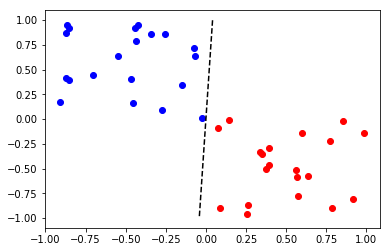

In [8]:
if __name__ == "__main__":
    # Se genera los datos de prueba con los que entrenara el perceptron.
    datosEntrenamiento = datosGenerados(30)             
    
    # Se instancia del perceptron.
    perceptron = Perceptron()                           
    
    # Se entrena el perceptron con los datos de prueba.
    perceptron.entrenamiento(datosEntrenamiento)        
    
    # Se genera los datos con los que probara el perceptron.
    datosPrueba = datosGenerados(20)                    

    # Se prueba el perceptron con los datos de prueba.
    # Se recorre los datos de prueba.
    for x in datosPrueba:                               
        # Obtenemos la respuesta del perceptron.
        r = perceptron.respuesta(x)                     
    
        # Verificamos si la respuesta no es correcta.
        if r != x[2]:                                   
            # Si no es correcta, imprimimos 'error', 
            # no se agrega el punto a la grafica.
            print ('error')                             
        if r == 1:                                      
            # Si la respuesta es 1, lo pintamos de azul.
            plot(x[0],x[1],'ob')                        
        else:
            # De lo contrario, lo pintamos de rojo.
            plot(x[0],x[1],'or')                        

    # Se gráfica una línea de separación, la cual es ortogonal a w.
    n = norm(perceptron.w)
    ww = perceptron.w/n
    ww1 = [ww[1],-ww[0]]
    ww2 = [-ww[1],ww[0]]
    plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
    show()

Los puntos azules representan los datos de la primera clase, y los puntos rojos a la segunda, estos son los datos de pruebas que generamos para probar el perceptron, y la linea punteada es la linea de separacion que aprendio el perceptron durante el entrenamiento.